1  ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

1.1  Inicialización

In [366]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns

1.2  Cargar datos

In [367]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('megaline_calls.csv')
internet_df = pd.read_csv('megaline_internet.csv')
messages_df = pd.read_csv('megaline_messages.csv')
plans_df = pd.read_csv('megaline_plans.csv')
users_df = pd.read_csv('megaline_users.csv')


1.3  Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

1.4  Tarifas

In [368]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [369]:
# Imprime una muestra de los datos para las tarifas
print('Muestra de los datos para las tarifas\n')
print(plans_df.head())

Muestra de los datos para las tarifas

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El Dataset contiene 8 columnas, al parecer todas tiene los tipos correctos de datos y los nombres son claros a excepcion de usd_monthly_pay, creo que seria mejor usd_montly_fee, ninguna columna tiene datos ausentes. solo es actualizar el nombre de 1 columna.

1.5  Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [370]:
# Cambio de nombre en columna para mejor claridad y descripcion
plans_df = plans_df.rename(columns = {'mb_per_month_included': 'mb_included',
                                      'usd_monthly_pay': 'usd_monthly_fee',
                                      'usd_per_gb': 'usd_per_gb_exceeded',
                                      'usd_per_message': 'usd_per_message_exceeded',
                                      'usd_per_minute': 'usd_per_minute_exceeded'}
                          )
print(plans_df.columns)

Index(['messages_included', 'mb_included', 'minutes_included',
       'usd_monthly_fee', 'usd_per_gb_exceeded', 'usd_per_message_exceeded',
       'usd_per_minute_exceeded', 'plan_name'],
      dtype='object')


1.6  Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [371]:
# Agrega factores adicionales a los datos para mayor profundidad en el analisis
plans_df['plan_type'] = plans_df['usd_monthly_fee'].apply(lambda x: 'Premium' if x > 20 else 'Basic')
plans_df['usd_per_minute_cost'] = plans_df['usd_monthly_fee'] / plans_df['minutes_included']
plans_df['usd_per_gb_cost'] = plans_df['usd_monthly_fee'] / (plans_df['mb_included'] / 1240)
plans_df['usd_per_sms_cost'] = plans_df['usd_monthly_fee'] / plans_df['messages_included']

print('\nCosto unitario por servicio incluido en cada plan\n')
display(plans_df)


Costo unitario por servicio incluido en cada plan



,messages_included,mb_included,minutes_included,usd_monthly_fee,usd_per_gb_exceeded,usd_per_message_exceeded,usd_per_minute_exceeded,plan_name,plan_type,usd_per_minute_cost,usd_per_gb_cost,usd_per_sms_cost
0,50,15360,500,20,10,0.03,0.03,surf,Basic,0.040000,1.614583,0.40
1,1000,30720,3000,70,7,0.01,0.01,ultimate,Premium,0.023333,2.825521,0.07


1.7  Usuarios/as

In [372]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print('Informacion general del dataset Usuarios\n')
print(users_df.info())

Informacion general del dataset Usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [373]:
# Imprime una muestra de datos para usuarios
print('Vista general de dataset Usuarios\n')
display(users_df.head())
print('\nMuestra de datos para dataset Usuarios\n')
display(users_df.sample(10))

Vista general de dataset Usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Muestra de datos para dataset Usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
309,1309,Winfred,Zimmerman,19,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-04,surf,NaN
273,1273,Hermila,Ryan,25,"Baton Rouge, LA MSA",2018-10-13,ultimate,NaN
226,1226,Denver,Harrell,64,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-15,ultimate,NaN
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaN
462,1462,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,NaN
264,1264,Jessie,Hill,69,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-03,ultimate,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,NaN
465,1465,Arianna,Morrison,73,"Pittsburgh, PA MSA",2018-06-22,ultimate,NaN
261,1261,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Dentro del dataset se pueden hacer algunas correcciones en los nombres para que sean mas claros, tipo de datos y rellenar los valores nulos. Tambien note que el nombre de la cuidad de residencia del usuario tiene multiples ciudades, entonces podriamos filtrar los datos por la primera cuidad solamente para hacer un analisis mas correcto en el futuro.

1.7.1  Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [374]:
# Modificacion de nombre en columna
users_df = users_df.rename(columns={'reg_date': 'registration_date'})

# Modificacion de datatype en columnas
users_df['registration_date'] = pd.to_datetime(users_df['registration_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

# Verify changes on dataset
display(users_df.head())
print()
print(users_df.info())

,user_id,first_name,last_name,age,city,registration_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            500 non-null    int64         
 1   first_name         500 non-null    object        
 2   last_name          500 non-null    object        
 3   age                500 non-null    int64         
 4   city               500 non-null    object        
 5   registration_date  500 non-null    datetime64[ns]
 6   plan               500 non-null    object        
 7   churn_date         34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


1.7.2  Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [375]:
#Obtener la duracion de suscripcion por cliente
users_df['subscription_duration'] = (users_df['churn_date'] - users_df['registration_date']).dt.days
print('Duracion de suscripcion por cliente\n')
print(users_df['subscription_duration'])

# Verificar datos duplicados
duplicates = users_df[users_df.duplicated(subset=['user_id'], keep=False)]
print('usuarios_duplicados: ', duplicates)

Duracion de suscripcion por cliente

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: subscription_duration, Length: 500, dtype: float64
usuarios_duplicados:  Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, registration_date, plan, churn_date, subscription_duration]
Index: []


1.8  Llamadas

In [376]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [377]:
# Imprime una muestra de datos para las llamadas
display(calls_df.sample(10))

,id,user_id,call_date,duration
136203,1494_45,1494,2018-10-01,2.61
21471,1079_184,1079,2018-08-03,18.06
93412,1334_780,1334,2018-08-27,4.31
6411,1030_185,1030,2018-12-08,6.56
34721,1130_241,1130,2018-12-05,5.76
126424,1449_34,1449,2018-10-13,17.43
79945,1286_758,1286,2018-12-15,3.58
23190,1084_237,1084,2018-12-25,9.56
107806,1382_656,1382,2018-11-28,8.88
100450,1359_328,1359,2018-09-22,4.66


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Creo que en este dataset podriamos hacer algunos cambios en el nobmre de las columnas 'id' and 'duration' para que sean mas homogeneos los nombres, tambien cambiar el datatype de 'call_date' por datetime64,

1.8.1  Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [378]:
# Modify calls_df columns name
calls_df = calls_df.rename(columns={'id': 'caller_id', 'duration': 'call_duration'})

# Modify datatype for column 'call_date'
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Verify changes on dataset
print(calls_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   caller_id      137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   call_duration  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


1.8.2  Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [379]:
# Analizar llamadas por usuario
calls_per_user = calls_df.groupby('user_id')['call_date'].count().reset_index()
print('Llamadas por usuario\n', calls_per_user)

# Cual es el maximo tiempo en duracion de llamadas
max_call_duration = calls_df['call_duration'].max()
print(f'\nDuracion maxima de una llamda: {max_call_duration} minutos\n')

# lapso de tiempo entre llamadas
# Ordenar por usuario y fecha de llamada
calls_df = calls_df.sort_values(by=['user_id', 'call_date'])
# calcular tiempo entre llamadas
calls_df['time_between_calls'] = calls_df.groupby('user_id')['call_date'].diff()
# Imprimir resultado
print('\nLapso de tiempo entre llamadas por usuario\n')
display(calls_df[['user_id', 'call_date', 'time_between_calls']])


Llamadas por usuario
      user_id  call_date
0       1000         16
1       1001        261
2       1002        113
3       1003        149
4       1004        370
..       ...        ...
476     1495        253
477     1496        195
478     1497         54
479     1498        451
480     1499        204

[481 rows x 2 columns]

Duracion maxima de una llamda: 37.6 minutos


Lapso de tiempo entre llamadas por usuario



,user_id,call_date,time_between_calls
9,1000,2018-12-26,NaT
14,1000,2018-12-26,0 days
0,1000,2018-12-27,1 days
1,1000,2018-12-27,0 days
2,1000,2018-12-27,0 days
...,...,...,...
137708,1499,2018-12-29,1 days
137734,1499,2018-12-29,0 days
137638,1499,2018-12-30,1 days
137587,1499,2018-12-31,1 days


1.9  Mensajes

In [380]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [381]:
# Imprime una muestra de datos para los mensajes
display(messages_df.sample(10))


,id,user_id,message_date
57754,1364_6,1364,2018-08-17
19379,1125_47,1125,2018-12-29
35322,1227_25,1227,2018-12-26
55406,1348_193,1348,2018-11-17
53257,1339_391,1339,2018-11-30
18818,1122_47,1122,2018-06-13
41785,1268_158,1268,2018-06-09
10007,1076_39,1076,2018-12-26
31943,1199_29,1199,2018-10-19
27120,1167_77,1167,2018-12-07


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] 

El data set contiene informacion sobre el servicio de SMS, fecha e identificadores de usario y mensajes, hace falta un nombre mas claro para la columna 'id' y tambien se necesita corregir el datatype de 'message_date'

1.9.1  Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [382]:
# Modificar el nombre de la columna 'id'
messages_df = messages_df.rename(columns={'id': 'message_id'})

# Corregir el datatype de 'message_date'
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


1.9.2  Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [383]:
# Calcula mensajes por usuario
messages_per_user = messages_df.groupby('user_id')['message_id'].count().reset_index()
messages_per_user = messages_per_user.rename(columns={'message_id': 'total_messages'})

# Mostrar los mensajes usados por plan, combina users_df con messages_df
# Combinar mensajes por usuario
merged_df = messages_per_user.merge(users_df, on = 'user_id', how='left')

# Combinar planes
merged_df =  merged_df.merge(plans_df, left_on='plan', right_on='plan_name', how = 'left')
#print(merged_df)

merged_df['extra_messages'] = merged_df['total_messages'] - merged_df['messages_included']
merged_df['extra_messages'] = merged_df['extra_messages'].apply(lambda x: max(0,x))

# Imprimir resultado
display(merged_df[['user_id', 'total_messages', 'messages_included', 'extra_messages']].head())


,user_id,total_messages,messages_included,extra_messages
0,1000,11,1000,0
1,1001,207,50,157
2,1002,88,50,38
3,1003,50,50,0
4,1004,177,50,127


1.10  Internet

In [384]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [385]:
# Imprime una muestra de datos para el tráfico de internet
display(internet_df.sample(10))


,id,user_id,session_date,mb_used
14230,1066_120,1066,2018-10-13,407.35
80624,1377_49,1377,2018-09-21,188.42
1613,1009_148,1009,2018-07-28,543.19
14412,1066_305,1066,2018-04-13,176.53
5474,1030_73,1030,2018-12-07,3.90
50103,1223_303,1223,2018-07-08,474.73
63637,1292_341,1292,2018-12-18,525.21
4625,1028_182,1028,2018-03-12,529.83
79274,1369_15,1369,2018-12-21,516.65
66888,1312_111,1312,2018-08-23,234.41


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Este Dataset tiene 4 columnas que continen la informacion del uso del servicio de internet, se necesitan hacer cambios en el nombre del ID de sesion por un nombre mas descriptivo y hacer el cambio de datatype en la columna 'session_date" a tipo de datos de fechas, tiene algunos datos en 0 para la columna de 'mb_used', el cual seria bueno investigar cuantos usarios no usan megas, no contiene datos nulos asi que no es necesario hacer ningun otro ajuste a la tabla.

1.10.1  Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [386]:
# Modifica el datatype de 'session_date'
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Modifica el nombre de la columna 'id' se sesion
internet_df = internet_df.rename(columns={'id': 'session_id'})

# Imprime los datos generales con los cambios
print(internet_df.info())
print()
display(internet_df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None



,session_id,user_id,session_date,mb_used
38879,1174_142,1174,2018-06-23,683.64
4190,1027_18,1027,2018-09-05,796.44
104411,1498_485,1498,2018-09-08,463.66
76108,1358_234,1358,2018-11-20,333.35
19544,1088_321,1088,2018-09-03,301.29
79217,1368_416,1368,2018-12-09,93.26
4059,1023_24,1023,2018-07-14,914.85
64341,1295_266,1295,2018-09-08,0.00
54397,1246_298,1246,2018-06-12,679.11
4493,1028_46,1028,2018-05-15,0.00


1.10.2  Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [387]:
# Combinar internet_df con users_df
internet_merge_df = internet_df.merge(users_df, on='user_id', how='left')

# Combinar internet_merge_df con plans_df
internet_merge_df = internet_merge_df.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Megabites por usario basado en el plan
total_mb_per_user = internet_merge_df.groupby('user_id')['mb_used'].sum().reset_index()
total_mb_per_user = total_mb_per_user.rename(columns={'mb_used': 'total_mb_used'})

# Uso promedio mensual de MB por usuario
monthly_avg_mb = internet_merge_df.groupby('user_id')['mb_used'].mean().reset_index()
monthly_avg_mb = monthly_avg_mb.rename(columns={'mb_used': 'monthly_avg_mb'})

# Megabites extras por usuario
internet_merge_df['session_excess_mb'] = internet_merge_df['mb_used'] - internet_merge_df['mb_included']
internet_merge_df['session_excess_mb'] = internet_merge_df['session_excess_mb'].clip(lower=0)
internet_merge_df['month'] = internet_merge_df['session_date'].dt.to_period('M')

# Meses con exceso por usuario
months_with_excess = internet_merge_df.groupby(['user_id', 'month'])['session_excess_mb'].sum().reset_index()
months_with_excess['had_excess'] = months_with_excess['session_excess_mb'] > 0
excess_months_per_user = months_with_excess.groupby('user_id')['had_excess'].sum().reset_index()
excess_months_per_user = excess_months_per_user.rename(columns={'had_excess':'months_with_excess'})

# Combinar metricas
user_mb_analysis = total_mb_per_user.merge(monthly_avg_mb, on='user_id').merge(excess_months_per_user, on='user_id')

print('Analisis de uso de datos por usuario')
display(user_mb_analysis.head())

# Analisis por grupos de edad
monthly_mb_per_user = internet_merge_df.groupby(['user_id', 'month', 'age'])['mb_used'].sum().reset_index()

# Grupos de edad
bins=[10,18,25,35,45,55,65,100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
monthly_mb_per_user['age_group'] = pd.cut(monthly_mb_per_user['age'], bins=bins, labels=labels)

# Calculo de metricas por grupos de edad
mb_usage_by_age = monthly_mb_per_user.groupby('age_group').agg(
    avg_monthly_mb=('mb_used', 'mean'), 
    median_monthly_mb=('mb_used', 'median'),
    users_count=('user_id', 'nunique')
).reset_index()

print('\nUso de datos mensuales por grupo de edad')
display(mb_usage_by_age)

# Sesiones sin uso de datos
zero_mb_sessions = internet_df[internet_df['mb_used']== 0].shape[0]
print(f'\nNUmero de sesiones con 0 MB usados: {zero_mb_sessions}')

Analisis de uso de datos por usuario


,user_id,total_mb_used,monthly_avg_mb,months_with_excess
0,1000,1901.47,380.294000,0
1,1001,80437.94,328.318122,0
2,1002,40293.33,324.946210,0
3,1003,27044.14,520.079615,0
4,1004,156352.81,339.897413,0



Uso de datos mensuales por grupo de edad


C:\Users\jovan\AppData\Local\Temp\ipykernel_30128\3665254536.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mb_usage_by_age = monthly_mb_per_user.groupby('age_group').agg(


,age_group,avg_monthly_mb,median_monthly_mb,users_count
0,0-18,16980.015122,16784.620,15
1,19-25,16228.884480,16716.380,56
2,26-35,16656.288243,16778.115,94
3,36-45,17826.576456,17325.100,76
4,46-55,16528.156754,16813.730,88
5,56-65,16598.918988,16499.790,81
6,65+,17529.941852,17425.345,79



NUmero de sesiones con 0 MB usados: 13747


1.11  Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [388]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans_df.head())
      

,messages_included,mb_included,minutes_included,usd_monthly_fee,usd_per_gb_exceeded,usd_per_message_exceeded,usd_per_minute_exceeded,plan_name,plan_type,usd_per_minute_cost,usd_per_gb_cost,usd_per_sms_cost
0,50,15360,500,20,10,0.03,0.03,surf,Basic,0.040000,1.614583,0.40
1,1000,30720,3000,70,7,0.01,0.01,ultimate,Premium,0.023333,2.825521,0.07


1.12  Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [389]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_df['month'] = calls_df['call_date'].dt.to_period('M')


# Agrupar las columnas necesarias del df calls
calls_per_user_monthly = calls_df.groupby(['user_id', 'month'])['call_date'].count().reset_index()

calls_per_user_monthly = calls_per_user_monthly.rename(columns={'call_date':'total_calls'})

print('Llamadas por usuario por mes\n')
display(calls_per_user_monthly.head())

Llamadas por usuario por mes



,user_id,month,total_calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [390]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# redondeo de cada llamada
calls_df['call_duration_rounded'] = calls_df['call_duration'].apply(mt.ceil)

# Agrupar por usuario y mes
minutes_per_user_monthly = calls_df.groupby(['user_id', 'month'])['call_duration_rounded'].sum().reset_index()
minutes_per_user_monthly = minutes_per_user_monthly.rename(columns={'call_duration_rounded': 'total_minutes'})

print('\nMinutos redondeados por usuario al mes')
display(minutes_per_user_monthly.head())


Minutos redondeados por usuario al mes


,user_id,month,total_minutes
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [391]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

messages_per_user_monthly = messages_df.groupby(['user_id', 'month'])['message_id'].count().reset_index()
messages_per_user_monthly = messages_per_user_monthly.rename(columns={'message_id':'tota_messages'})

print('\nMensajes mensuales por usuario')
display(messages_per_user_monthly.head())


Mensajes mensuales por usuario


,user_id,month,tota_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [392]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

mb_per_user = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
mb_per_user = mb_per_user.rename(columns={'mb_used': 'total_mb_used'})

print('\nMB mensuales por usuario')
display(mb_per_user.head())



MB mensuales por usuario


,user_id,month,total_mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [393]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_dataframes = calls_per_user

# Fusionar dataframe minutos por llamada
merged_dataframes = merged_dataframes.merge(minutes_per_user_monthly, on='user_id', how='outer')

# Fusionar con mensajes por usuario
merged_dataframes = merged_dataframes.merge(messages_per_user_monthly, on=['user_id', 'month'], how='outer')

# Fusionar con MB por usuario
merged_dataframes = merged_dataframes.merge(mb_per_user, on=['user_id', 'month'], how='outer')

merged_dataframes = merged_dataframes.loc[:, ~merged_dataframes.columns.duplicated()]
# Mostrar dataframes fusionados
display(merged_dataframes.head())


,user_id,call_date,month,total_minutes,tota_messages,total_mb_used
0,1000,16.0,2018-12,124.0,11.0,1901.47
1,1001,261.0,2018-08,182.0,30.0,6919.15
2,1001,261.0,2018-09,315.0,44.0,13314.82
3,1001,261.0,2018-10,393.0,53.0,22330.49
4,1001,261.0,2018-11,426.0,36.0,18504.30


In [394]:
# Añade la información de la tarifa
merged_dataframes = merged_dataframes.merge(users_df[['user_id', 'plan']], on='user_id', how='left')
merged_dataframes = merged_dataframes.merge(plans_df, left_on='plan', right_on='plan_name', how='left')


display(merged_dataframes.head())

,user_id,call_date,month,total_minutes,tota_messages,total_mb_used,plan,messages_included,mb_included,minutes_included,usd_monthly_fee,usd_per_gb_exceeded,usd_per_message_exceeded,usd_per_minute_exceeded,plan_name,plan_type,usd_per_minute_cost,usd_per_gb_cost,usd_per_sms_cost
0,1000,16.0,2018-12,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,Premium,0.023333,2.825521,0.07
1,1001,261.0,2018-08,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,Basic,0.040000,1.614583,0.40
2,1001,261.0,2018-09,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,Basic,0.040000,1.614583,0.40
3,1001,261.0,2018-10,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,Basic,0.040000,1.614583,0.40
4,1001,261.0,2018-11,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,Basic,0.040000,1.614583,0.40


Calcula los ingresos mensuales por usuario:

- resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; 
- multiplica el resultado por el valor del plan de llamadas; 
- añade la tarifa mensual en función del plan de llamadas. 
    
Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.

In [395]:
# Calcula el ingreso mensual para cada usuario

merged_dataframes = merged_dataframes.rename(columns={'tota_messages': 'total_messages'})

# guarda el resultado de los servicios extras usados por el cliente en una nueva columna
merged_dataframes['extra_minutes_call'] = (
    merged_dataframes['total_minutes'].fillna(0) - 
    merged_dataframes['minutes_included']
    ).clip(lower=0)
merged_dataframes['extra_message'] = (
    merged_dataframes['total_messages'].fillna(0) - 
    merged_dataframes['messages_included']
    ).clip(lower=0)
merged_dataframes['extra_mb'] = (
    merged_dataframes['total_mb_used'].fillna(0) - 
    merged_dataframes['mb_included']
    ).clip(lower=0)

# Convertir MB a GB y redondeo hacia arriba
merged_dataframes['extra_gb'] = np.ceil(merged_dataframes['extra_mb'] / 1024)

#print(merged_dataframes.head())

# Guarda los datos del costo de los servicios extra usado po usario
merged_dataframes['extra_minute_cost'] = (
    merged_dataframes['extra_minutes_call'] * 
    merged_dataframes['usd_per_minute_exceeded']
    ).fillna(0)
merged_dataframes['extra_message_cost'] = (
    merged_dataframes['extra_message'] * 
    merged_dataframes['usd_per_message_exceeded']
    ).fillna(0)
merged_dataframes['extra_data_cost'] = (
    merged_dataframes['extra_gb'] * 
    merged_dataframes['usd_per_gb_exceeded']
    ).fillna(0)

# Añade la tarifa mensual al costo de todos los servicios extra usados
merged_dataframes['monthly_revenue'] = (
    merged_dataframes['usd_monthly_fee'].fillna(0) + 
    merged_dataframes['extra_minute_cost'] + 
    merged_dataframes['extra_message_cost'] +
    merged_dataframes['extra_data_cost']
)

# Muestra las columnas relevantes
print("Ingresos mesuales por usuario")
display(merged_dataframes[['user_id', 'month', 'plan', 'usd_monthly_fee', 
                         'extra_minute_cost', 'extra_message_cost', 
                         'extra_data_cost', 'monthly_revenue']])

print('\nResumen estadistico de ingresos\n')
print(merged_dataframes['monthly_revenue'].describe())

Ingresos mesuales por usuario


,user_id,month,plan,usd_monthly_fee,extra_minute_cost,extra_message_cost,extra_data_cost,monthly_revenue
0,1000,2018-12,ultimate,70,0.0,0.00,0.0,70.00
1,1001,2018-08,surf,20,0.0,0.00,0.0,20.00
2,1001,2018-09,surf,20,0.0,0.00,0.0,20.00
3,1001,2018-10,surf,20,0.0,0.09,70.0,90.09
4,1001,2018-11,surf,20,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...,...
2288,1498,2018-12,surf,20,0.0,0.00,80.0,100.00
2289,1499,2018-09,surf,20,0.0,0.00,0.0,20.00
2290,1499,2018-10,surf,20,0.0,0.00,50.0,70.00
2291,1499,2018-11,surf,20,0.0,0.00,20.0,40.00



Resumen estadistico de ingresos

count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: monthly_revenue, dtype: float64


1.13  Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

1.13.1  Llamadas

,monthly_calls,plan,average_minutes_call
0,2018-01,surf,6.428000
1,2018-01,ultimate,6.541518
2,2018-02,surf,6.906175
3,2018-02,ultimate,6.517230
4,2018-03,surf,6.696919


<Figure size 1500x800 with 0 Axes>

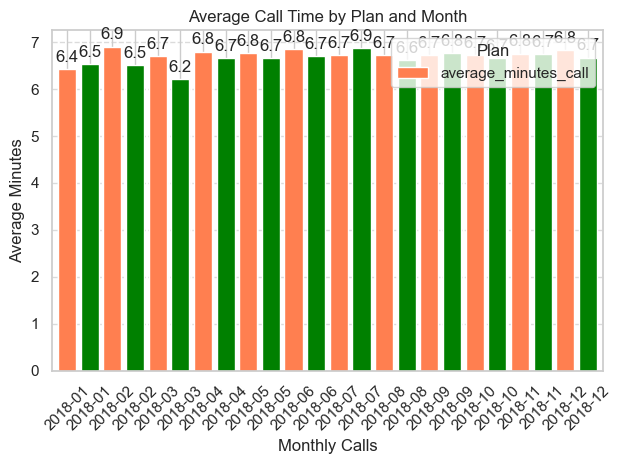

In [396]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Extraer los datos de llamadas por mes
calls_df['monthly_calls'] = calls_df['call_date'].dt.to_period('M')
#print(calls_df['monthly_calls'])

# Fusionar users_df con calls_df para obtener cada plan
calls_by_plans = calls_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')
#print(calls_by_plans)

# Calcular el promedio por mes y plan
average_call_duration = calls_by_plans.groupby(['monthly_calls', 'plan'])['call_duration'].mean().reset_index()

# Rename call_duration columns since now contains the average info of the calls
average_call_duration = average_call_duration.rename(columns={'call_duration': 'average_minutes_call'})

average_call_duration.pivot_table(
    index='monthly_calls',
    columns='plan',
    values='average_minutes_call'
    ).reset_index()

display(average_call_duration.head())

plt.figure(figsize=(15,8))

ax = average_call_duration.plot(
    x='monthly_calls',
    y='average_minutes_call',
    kind='bar',
    title='Average Call Time by Plan and Month',
    xlabel='Monthly Calls',
    ylabel='Average Minutes',
    color=['coral','green'],
    width=0.8
)

plt.legend(title='Plan', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=(0.7))
plt.xticks(rotation=45)

for p in ax.containers:
    ax.bar_label(p, fmt='%.1f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

   user_id      plan monthly_calls  total_monthly_minutes
0     1000  ultimate       2018-12                 116.83
1     1001      surf       2018-08                 171.14
2     1001      surf       2018-09                 297.69
3     1001      surf       2018-10                 374.11
4     1001      surf       2018-11                 404.59


<function matplotlib.pyplot.show(close=None, block=None)>

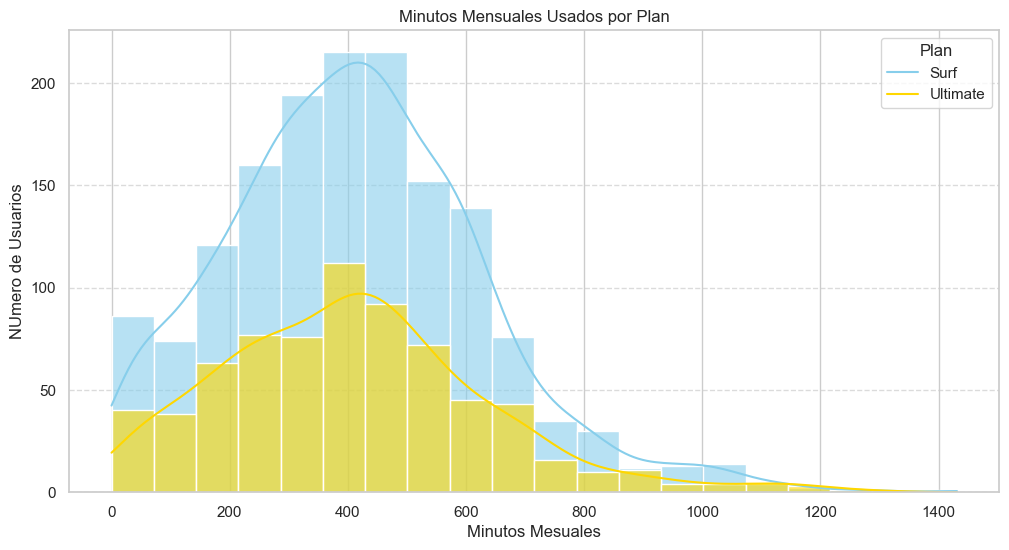

In [397]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Calcular minutos mensuales totales por usuario
monthly_minutes_per_user = calls_by_plans.groupby(['user_id', 'plan', 'monthly_calls'])['call_duration'].sum().reset_index()
monthly_minutes_per_user = monthly_minutes_per_user.rename(columns={'call_duration': 'total_monthly_minutes'})

# Mostrar minutos totales
print(monthly_minutes_per_user.head())

# Crear histograma
plt.figure(figsize=(12,6))

sns.histplot(
    data= monthly_minutes_per_user,
    x= 'total_monthly_minutes',
    hue='plan',
    bins=20,
    kde=True,
    palette={'surf':'skyblue', 'ultimate':'gold'},
    alpha=0.6,
    edgecolor='white'
)

plt.title('Minutos Mensuales Usados por Plan')
plt.xlabel('Minutos Mesuales')
plt.ylabel('NUmero de Usuarios')
plt.legend(title='Plan', labels=['Surf', 'Ultimate'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [398]:
# Calcula la media y la varianza de la duración mensual de llamadas.
monthly_minutes_per_call = calls_by_plans.groupby(['user_id', 'monthly_calls', 'plan'])['call_duration'].sum().reset_index()

stats_by_plan = monthly_minutes_per_user.groupby('plan')['total_monthly_minutes'].agg([
    ('media','mean'),
    ('variace', 'var')
]).reset_index()

print('\nEstadisticas de duracion de llamadas por plan\n')
display(stats_by_plan)


Estadisticas de duracion de llamadas por plan



,plan,media,variace
0,surf,412.097890,47001.254231
1,ultimate,410.180954,50510.631705


<function matplotlib.pyplot.show(close=None, block=None)>

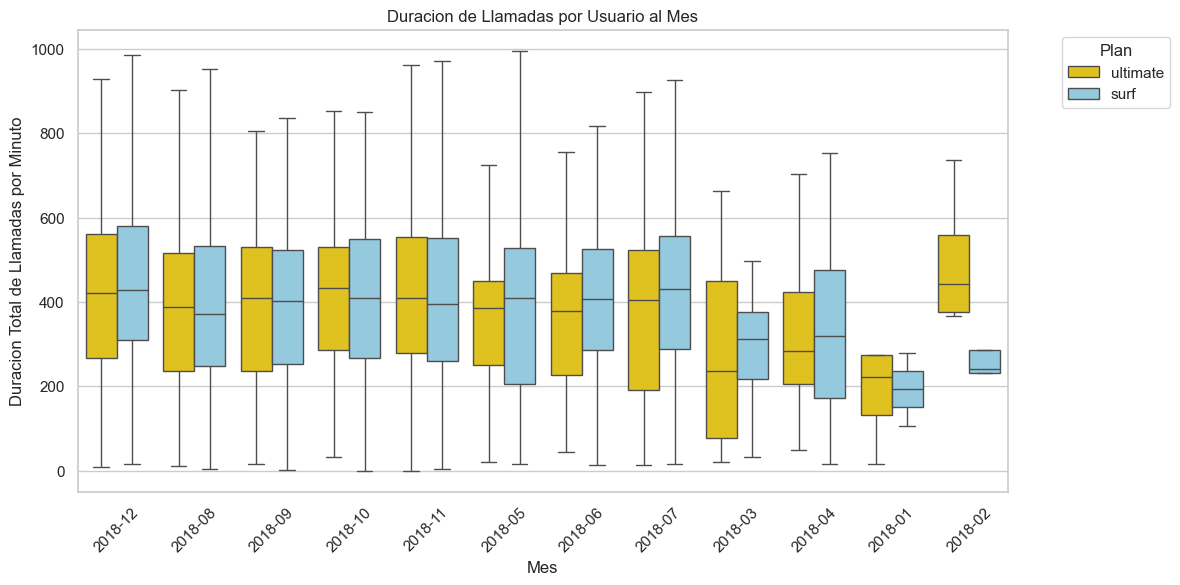

In [399]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Añade columna 'plan' para poder separar los planes en el boxplot
monthly_call_duration = monthly_minutes_per_user.groupby(
    ['user_id', 'monthly_calls', 'plan']
)['total_monthly_minutes'].sum().reset_index()

plt.figure(figsize=(12,6))

# Crear boxplot
boxplot = sns.boxplot(
    data= monthly_minutes_per_call,
    x='monthly_calls',
    y='call_duration',
    hue='plan',
    palette={'surf':'skyblue', 'ultimate':'gold'},
    showfliers = False
)


plt.title('Duracion de Llamadas por Usuario al Mes')
plt.xlabel('Mes')
plt.ylabel('Duracion Total de Llamadas por Minuto')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.2,1))

boxplot.legend(title='Plan', bbox_to_anchor=(1.05,1), loc='upper left')

plt.show


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Podemos ver que la media de los usuarios con el plan Surf tienen la cantidad de llamadas mas cerca del limite de su plan que los usuarios con el plan Ultimate, incluso ningun usuario con el plan Ultimate usa el total de minutos asignados, algunos tienen mas de mil minutos usados pero no llegan a los 3000 minutos, el comportamiento varia pero no por mucho, ya que la media en el plan surf esta entre 200 a 400 y la media de los usuarios con plan Ultimate estan entre 600 a 700 minutos usados.

1.13.2  Mensajes

,monthly_messages,plan,messages_count
0,2018-01,surf,21.000000
1,2018-01,ultimate,20.666667
2,2018-02,surf,21.600000
3,2018-02,ultimate,25.166667
4,2018-03,surf,21.937500


<function matplotlib.pyplot.show(close=None, block=None)>

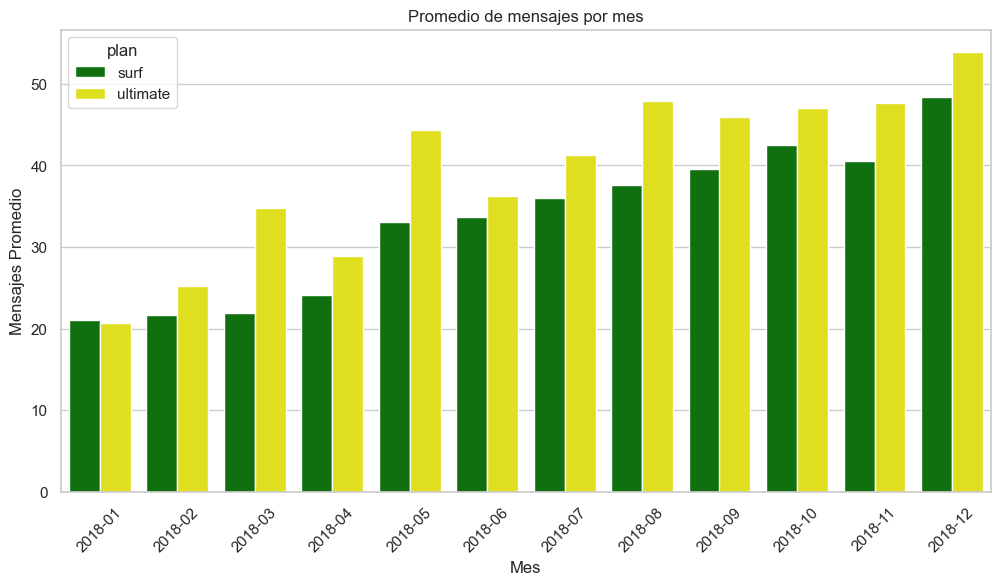

In [400]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Extraer los datos de los mensajes por mes
messages_df['monthly_messages'] = messages_df['message_date'].dt.to_period('M')

# Fusionar user_df con messages_df para obtener el plan
messages_by_plans = messages_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Calcular el numero de mensajes por usuario al mes con respecto al plan
messages_count = messages_by_plans.groupby(['user_id', 'monthly_messages', 'plan']).size().reset_index(name='messages_count')

# Calcular el promedio por mes y plan
plan_average_messages = messages_count.groupby(['monthly_messages', 'plan'])['messages_count'].mean().reset_index()
display(plan_average_messages.head())

# Crear grafico
plt.figure(figsize=(12,6))

sns.barplot(
    data=plan_average_messages,
    x='monthly_messages',
    y='messages_count',
    hue='plan',
    palette={'surf':'green', 'ultimate':'yellow'}
)

plt.title('Promedio de mensajes por mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes Promedio')
plt.xticks(rotation=45)

plt.show

In [401]:
# Calcula la media y la varianza de los mensajes enviados.
messages_stats = messages_count.groupby('plan')['messages_count'].agg(['mean', 'var']).reset_index()

print('\nEstadisticas desciptivas de mensaje por plan:')
display(messages_stats)


Estadisticas desciptivas de mensaje por plan:


,plan,mean,var
0,surf,40.109656,1091.344231
1,ultimate,46.296233,1085.183108


C:\Users\jovan\AppData\Local\Temp\ipykernel_30128\4260600279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


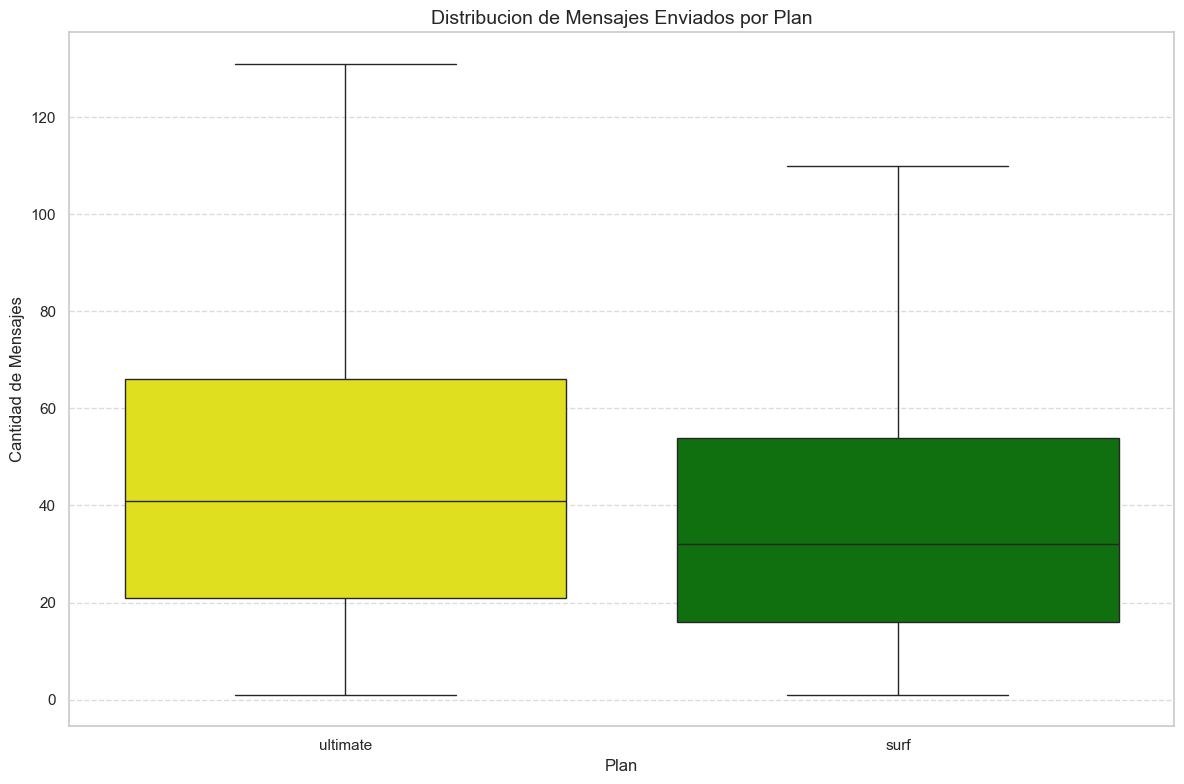

In [402]:
# Boxplot generar por plan
plt.figure(figsize=(12,8))

sns.boxplot(
    data=messages_count,
    x='plan',
    y='messages_count',
    palette={'surf':'green', 'ultimate': 'yellow'},
    showfliers=False
)

plt.title('Distribucion de Mensajes Enviados por Plan', fontsize=14)
plt.xlabel('Plan')
plt.ylabel('Cantidad de Mensajes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?

Podemos ver que los usuarios del plan Ultimate tienen un mayor uso de mensajes, con un rango intercuartilico indicando una mayor dispersion den el comportamiento, al contrario del plan Surf que tienden a tener un uso de mensajes mas moderados, sin embargo tambien vemos que algunos usuarios con este plan podrian migrar al plan ultimate, promoviendo las ventajas de tener un volumen mas alto de mensajes incluido en su plan.

1.13.3  Internet

Promedio por Mes y por Plan



,month,plan,gb_used
0,2018-01,surf,4.760605
1,2018-01,ultimate,6.755950
2,2018-02,surf,11.893402
3,2018-02,ultimate,16.727352
4,2018-03,surf,13.032656


<function matplotlib.pyplot.show(close=None, block=None)>

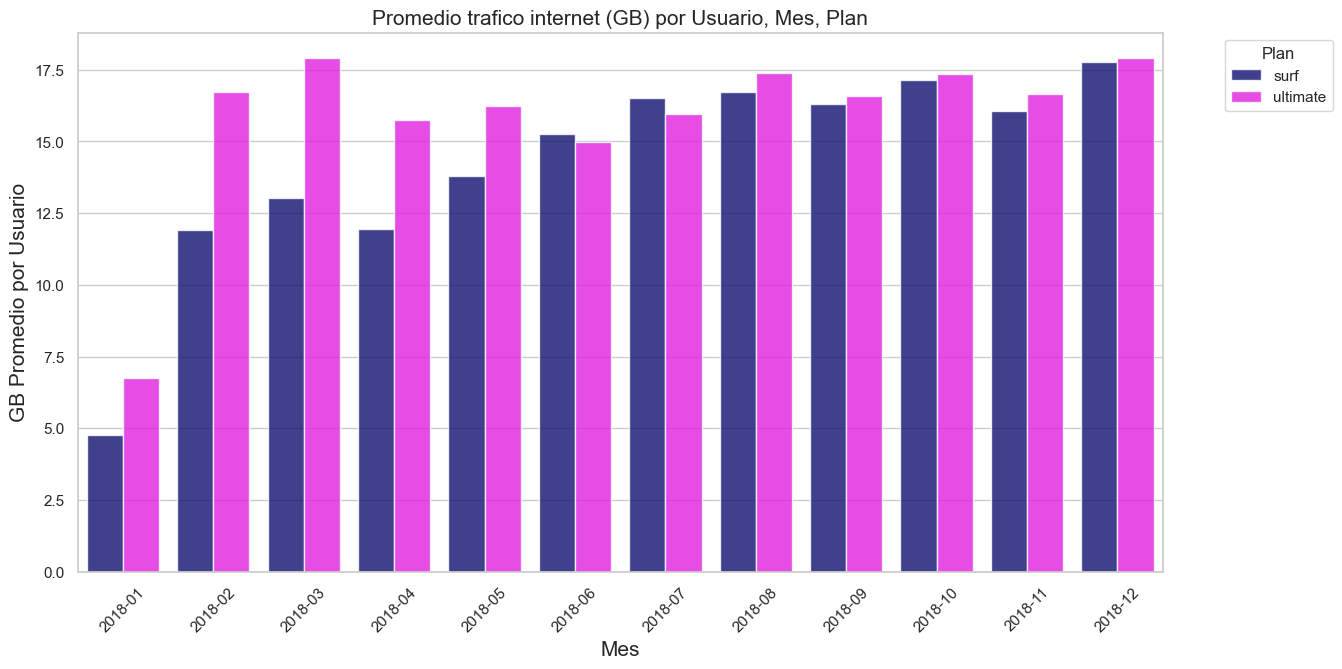

In [403]:
# Compara promedio de tráfico de Internet consumido por usuarios por plan y por mes. traza grafico de barras
# Convertir MB a GB y extraer el mes
internet_df['gb_used'] = internet_df['mb_used'] / 1024
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

# Fusionar con users_df para obtener plan
internet_traffic_data = internet_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Trafico de internet por usuario y mes
user_monthly_traffic = internet_traffic_data.groupby(['user_id', 'month', 'plan'])['gb_used'].sum().reset_index()

# Promedio por mes y plan
avg_traffic_by_plan_month = user_monthly_traffic.groupby(['month', 'plan'])['gb_used'].mean().reset_index()

# Mostrar promedio por mes y plan
print("Promedio por Mes y por Plan\n")
display(avg_traffic_by_plan_month.head())

# Convertir columna month a string para grafico
avg_traffic_by_plan_month['month'] = avg_traffic_by_plan_month['month'].astype(str)

# Crear grfico de barras
plt.figure(figsize=(14,7))

sns.barplot(
    data= avg_traffic_by_plan_month,
    x='month',
    y='gb_used',
    hue='plan',
    palette={'surf':'navy', 'ultimate':'magenta'},
    alpha=0.8
)

plt.title('Promedio trafico internet (GB) por Usuario, Mes, Plan', fontsize=15)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('GB Promedio por Usuario', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Plan', bbox_to_anchor=(1.05,1), loc='upper left')

plt.show



In [404]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
stats_by_plan = user_monthly_traffic.groupby('plan')['gb_used'].describe()
print('\nEstadisticas descriptivas de mensaje por plan:\n')
display(stats_by_plan)


Estadisticas descriptivas de mensaje por plan:



,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1558.0,16.325881,7.699886,0.090146,11.90230,16.527178,20.546738,69.269131
ultimate,719.0,16.834612,7.647479,0.227705,12.37415,16.468213,20.532378,45.503252



Estadisticas descriptivas por plan:



,plan_name,mean_mb,variance_mb
0,surf,78452.349187,3.569021e+09
1,ultimate,78946.393503,4.428806e+09


C:\Users\jovan\AppData\Local\Temp\ipykernel_30128\375740010.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(


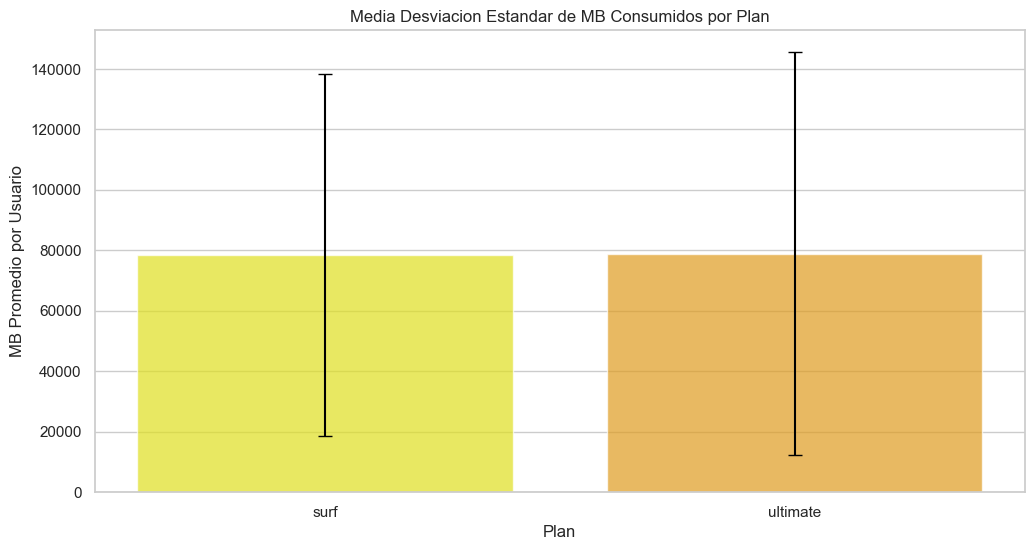

In [405]:
# Calcula la media y la varianza de los megas usados.
 #estadisticas agregadas al plan
mb_by_user = internet_traffic_data.groupby(['user_id', 'plan'])['mb_used'].sum().reset_index()

# Estadisticas agregadas por plan
stats_by_plan = mb_by_user.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()

# Modificar nombres de las columnas
stats_by_plan.columns = ['plan_name', 'mean_mb', 'variance_mb']

# Muestra las estadisticas
print('\nEstadisticas descriptivas por plan:\n')
display(stats_by_plan)


plt.figure(figsize=(12,6))

# Grafica de barras para la media
ax =sns.barplot(
    data=stats_by_plan,
    x='plan_name',
    y='mean_mb',
    palette={'surf':'yellow', 'ultimate':'orange'},
    alpha=0.7
)

# Añadir lineas de varianza
for i, row in stats_by_plan.iterrows():
    ax.errorbar(
        x=i,
        y=row['mean_mb'],
        yerr=np.sqrt(row['variance_mb']),
        fmt='none',
        color='black',
        capsize=5
    )

plt.title('Media Desviacion Estandar de MB Consumidos por Plan')
plt.xlabel('Plan')
plt.ylabel('MB Promedio por Usuario')

plt.show()

C:\Users\jovan\AppData\Local\Temp\ipykernel_30128\3158583567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


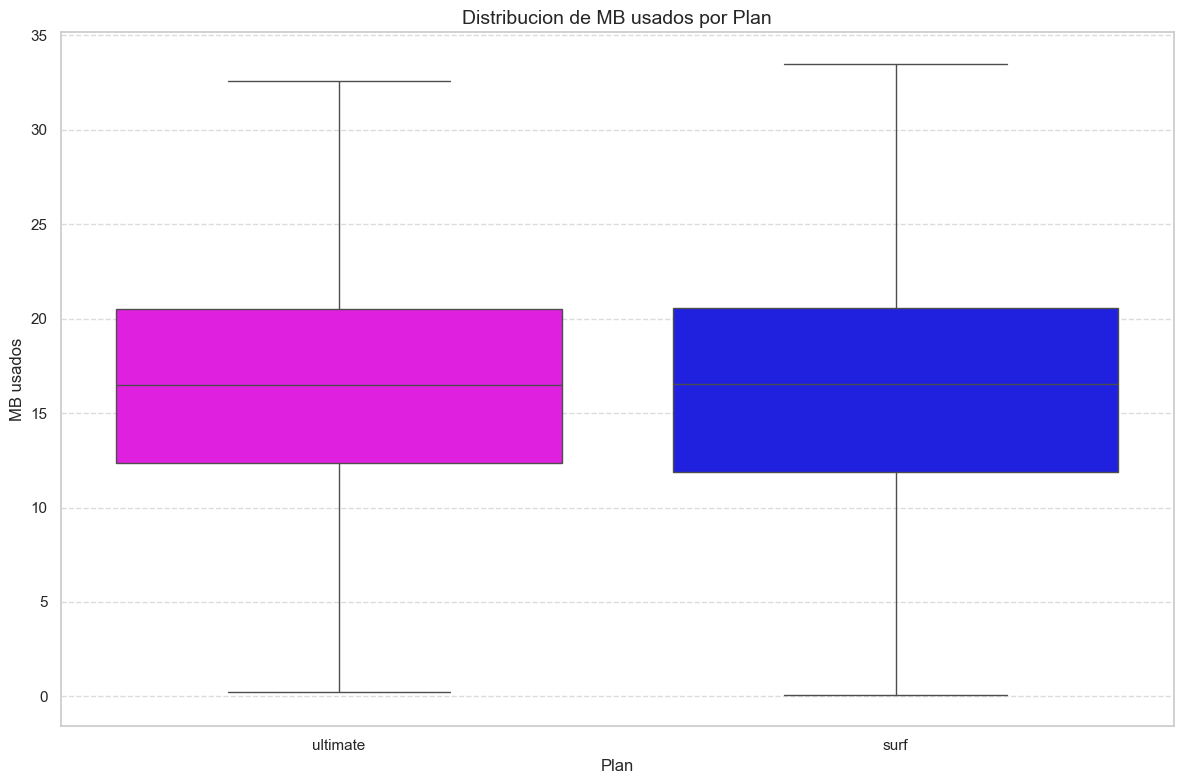

In [406]:
# Boxplot por plan
plt.figure(figsize=(12,8))

sns.boxplot(
    data=user_monthly_traffic,
    x='plan',
    y='gb_used',
    palette={'surf': 'blue', 'ultimate':'magenta'},
    showfliers=False
)

plt.title('Distribucion de MB usados por Plan', fontsize=14)
plt.xlabel('Plan')
plt.ylabel('MB usados', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Podemos constatar que al pricipio del año la diferencia entre el uso de internet de los planes era moderado para el plan Ultimate y bajo para el plan Surf, con el paso del tiempo los usuarions empezarion a incrementar el uso de MB y al final del año los usuarios de ambos planes usaban el casi la misma cantidad de MB. Al sacar la media podemos constatar que los datos arrojados en la grafica son verdaderos y nos damos cuenta que los usuarios de ambos planes tienen una minima diferencia en los resultados y en la varianza se puede ver una diferencia de 1 punto aproximadamente. 

En conclusion los usuarios del paquete Surf son los clientes que compran mas MB nivelando los mismos datos que gastarian si adquirieran el plan Ultimate. 

1.14  Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]


Estadísticas completas de ingresos por plan:


monthly_revenue                                                    \
                   media varianza desviación_estándar mínimo   25% mediana   
plan                                                                         
surf               60.71  3067.84               55.39   20.0  20.0   40.36   
ultimate           72.31   129.85               11.40   70.0  70.0   70.00   

                                  
            75%  máximo usuarios  
plan                              
surf      80.36  590.37     1573  
ultimate  70.00  182.00      720

C:\Users\jovan\AppData\Local\Temp\ipykernel_30128\151247146.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


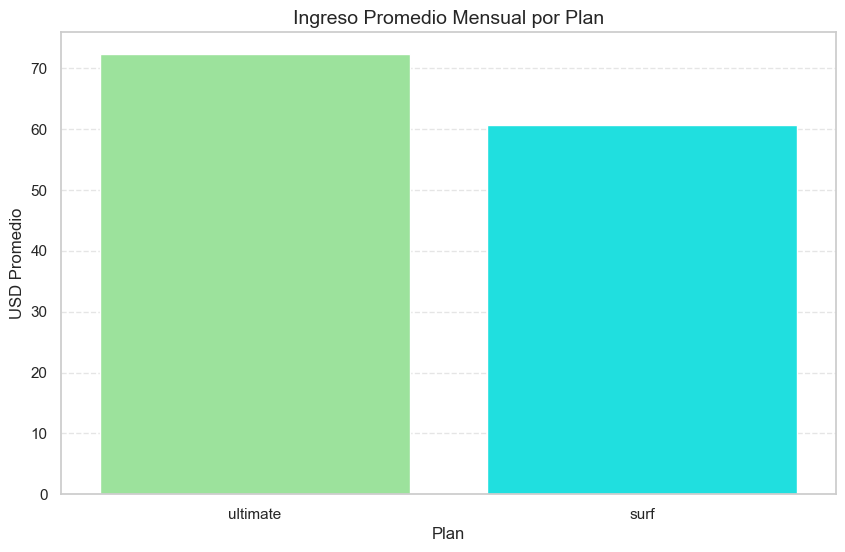

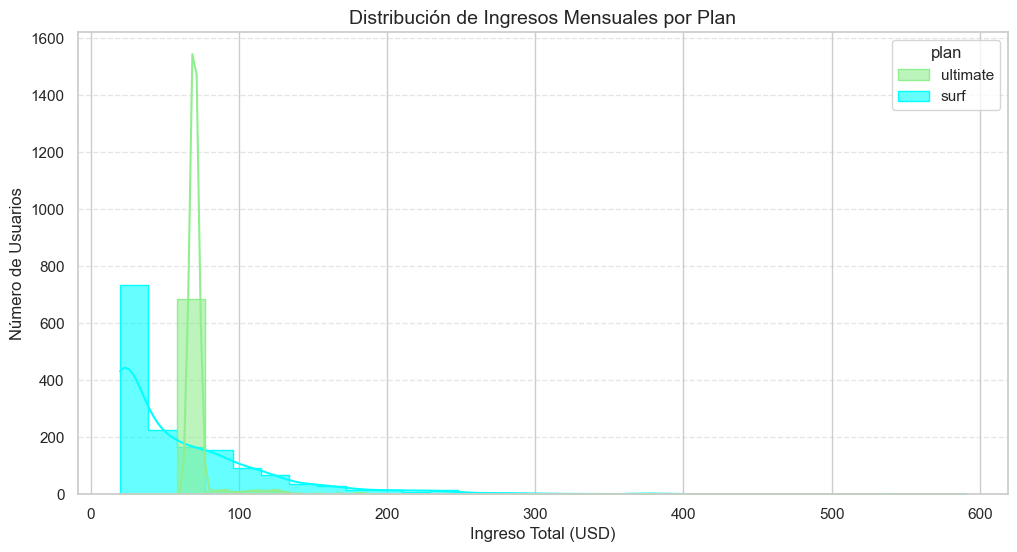

C:\Users\jovan\AppData\Local\Temp\ipykernel_30128\151247146.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


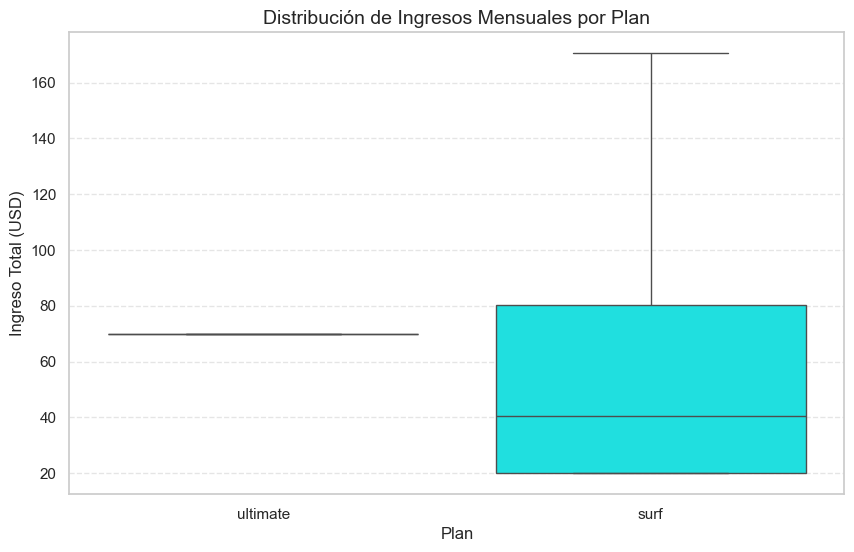

In [407]:
# Promedio de ingresos por usuario, por plan y por mes. traza grafico de barras
# Análisis estadístico completo
income_stats = merged_dataframes.groupby('plan').agg({
    'monthly_revenue': [
        ('media', 'mean'),
        ('varianza', 'var'),
        ('desviación_estándar', 'std'),
        ('mínimo', 'min'),
        ('25%', lambda x: x.quantile(0.25)),
        ('mediana', 'median'),
        ('75%', lambda x: x.quantile(0.75)),
        ('máximo', 'max'),
        ('usuarios', 'count')
    ]
}).round(2)

print("\nEstadísticas completas de ingresos por plan:")
display(income_stats)

# A) Gráfico de barras (promedio mensual por plan)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_dataframes.reset_index(),
    x='plan',
    y='monthly_revenue',
    estimator='mean',
    palette={'surf':'cyan', 'ultimate':'lightgreen'},
    errorbar=None
)
plt.title('Ingreso Promedio Mensual por Plan', fontsize=14)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('USD Promedio', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# B) Histograma (distribución de ingresos)
plt.figure(figsize=(12, 6))
sns.histplot(
    data=merged_dataframes.reset_index(),
    x='monthly_revenue',
    hue='plan',
    bins=30,
    kde=True,
    palette={'surf':'cyan', 'ultimate':'lightgreen'},
    alpha=0.6,
    element='step'
)
plt.title('Distribución de Ingresos Mensuales por Plan', fontsize=14)
plt.xlabel('Ingreso Total (USD)', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# C) Boxplot (distribución por plan)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_dataframes.reset_index(),
    x='plan',
    y='monthly_revenue',
    palette={'surf':'cyan', 'ultimate':'lightgreen'},
    showfliers=False  # Ocultar outliers para mejor visualización
)
plt.title('Distribución de Ingresos Mensuales por Plan', fontsize=14)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Ingreso Total (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
    
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

el numero de usuarios en el plan basico es mas del doble que el del plan premium, sin embargo el plan Ultimate apesar de tener menos usuarios tiene mayores ingresos.

1.15  Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [408]:
# Income_per_user
# Separar ingresos
surf_income = merged_dataframes[merged_dataframes['plan'] == 'surf']['monthly_revenue']
ultimate_income = merged_dataframes[merged_dataframes['plan'] == 'ultimate']['monthly_revenue']

print('Prueba de normalidad Surf:', st.shapiro(surf_income))
print('Prueba de normalidad Ultimate:', st.shapiro(ultimate_income))

Prueba de normalidad Surf: ShapiroResult(statistic=0.7346436826490573, pvalue=1.595415337861009e-44)
Prueba de normalidad Ultimate: ShapiroResult(statistic=0.20936336482354878, pvalue=1.3728118758764739e-47)


In [409]:
# Prueba t independente
t_stat, p_value = st.ttest_ind(ultimate_income, surf_income, equal_var=False)
print(f'\nPrueba t: estadistico={t_stat}, p value={p_value}')


Prueba t: estadistico=7.952094891333888, p value=3.170390548113574e-15


In [410]:
# Valor de alfa
alpha = 0.05

if p_value < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

Rechazamos la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [411]:
# Prueba las hipótesis
# Combinamos los ingresos por ubicacion
income_region = merged_dataframes.reset_index().merge(users_df[['user_id', 'city']], on='user_id')

# crear indicador para NY-NJ
income_region['is_ny_nj']= income_region['city'].str.contains('NY|NJ', case=False)

# Separar Ingresos
ny_nj_income = income_region[income_region['is_ny_nj']]['monthly_revenue']
other_income = income_region[~income_region['is_ny_nj']]['monthly_revenue']

# Prueba t independente
t_stat, p_value = st.ttest_ind(ny_nj_income, other_income, equal_var=False)
print(f'\nPrueba t: estadistico={t_stat}, p value={p_value}')

# Interpretacion
alpha = 0.05

if p_value < alpha:
    print('Rechazamos la hipotesis nula. Hay diferencia significativa')
else:
    print('No podemos rechazar la hipotesis nula. No hay diferencia significativa')


Prueba t: estadistico=-0.5378390000281691, p value=0.5908330350763751
No podemos rechazar la hipotesis nula. No hay diferencia significativa


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Al parecer dentro de los 2 planes que tienen acceso los usuarios ambos paquetes tiene bastante popularidad, aunque los ingresos por plan tiene grandes diferencias, siendo el paquete Ultimate el que tiene mejores ingresos, en cuanto a uso de servicios por plan, los usuarios de ambos planes los utilizan al maximo, incluso los usuarios del plan basico "Surf" suelen comprar servicios extras, a diferencia de los usuarios del plan Ultimate, no llegan a usar el maximo de sus servicios.

En cuanto a la primera hipotesis, podemos rechazar la idea de que los ingresos promedio de ambos planes son diferentes ya que el resultado es 1.0

y la segunda hipoteis comprueba que la diferencia de los ingresos promedios entre los usuarios de Nueva York y Nueva Jersey son muy parecidos, no hay una diferencia significativa en ellos, por lo tanto no se puede rechazar la hipotesis.